In [1]:
#get usage_pattern_dict from other jupyter file
%store -r usage_pattern_dict 
usage_pattern_dict = usage_pattern_dict

In [2]:
usage_pattern_dict

{'tf.placeholder': [<classes.UsagePattern at 0x2568f6c0d60>],
 'tf.reshape': [<classes.UsagePattern at 0x256909fd220>,
 'tf.argmax': [<classes.UsagePattern at 0x25690b230a0>,
 'tf.nn.softmax': [<classes.UsagePattern at 0x25691348430>],
 'tf.reduce_mean': [<classes.UsagePattern at 0x25691348dc0>],
 'tf.nn.softmax_cross_entropy_with_logits': [<classes.UsagePattern at 0x25691348e80>],
 'tf.train.GradientDescentOptimizer': [<classes.UsagePattern at 0x25691348790>],
 'tf.equal': [<classes.UsagePattern at 0x25691348250>],
 'tf.cast': [<classes.UsagePattern at 0x25691348670>],
 'tf.global_variables_initializer': [<classes.UsagePattern at 0x25691356160>],
 'tf.train.Saver': [<classes.UsagePattern at 0x25691356610>],
 'tf.Session': [<classes.UsagePattern at 0x25691356d00>],
 'tf.Variable': [<classes.UsagePattern at 0x25691356dc0>,
 'tf.truncated_normal': [<classes.UsagePattern at 0x25691356340>],
 'tf.constant': [<classes.UsagePattern at 0x256913564c0>],
 'tf.nn.conv2d': [<classes.UsagePattern 

In [3]:
usage_pattern_dict['tf.argmax']

In [4]:
for u in usage_pattern_dict['tf.argmax']:
    u.print()

========== Usage Pattern ==========
Target Method: tf.argmax
Pre-Set: {tf.placeholder, tf.reshape}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: tf.argmax
Pre-Set: {tf.nn.softmax}
Post-Set: {tf.reduce_mean, tf.nn.softmax_cross_entropy_with_logits, tf.train.GradientDescentOptimizer, tf.equal, tf.cast, tf.global_variables_initializer, tf.train.Saver, tf.Session}
Accompany-Set: {}


In [89]:
#[[cls.similarity(s1, s2, target, weights) for s2 in data] for s1 in data]
lst = [1,2,3,4,5]
lst2 = [10,20,300,40,500]
matrix = [[(s1+s2) for s2 in lst2] for s1 in lst]
# matrix = [  [1,     1/3,    1/2 ],
#             [1/3,   1,      1/4 ],
#             [1/2,   1/4,    1   ]]
matrix

[[11, 21, 301, 41, 501],
 [12, 22, 302, 42, 502],
 [13, 23, 303, 43, 503],
 [14, 24, 304, 44, 504],
 [15, 25, 305, 45, 505]]

In [90]:
import numpy as np

similarity = np.array(matrix)
similarity

array([[ 11,  21, 301,  41, 501],
       [ 12,  22, 302,  42, 502],
       [ 13,  23, 303,  43, 503],
       [ 14,  24, 304,  44, 504],
       [ 15,  25, 305,  45, 505]])

In [91]:
from sklearn.cluster import AffinityPropagation 
affprop = AffinityPropagation(affinity="precomputed", damping=0.5, convergence_iter=7, max_iter=400)
affprop.fit(similarity)

AffinityPropagation(affinity='precomputed', convergence_iter=7, max_iter=400)

In [92]:
cluster_centers_indices = affprop.cluster_centers_indices_
labels = affprop.labels_

In [118]:
cluster_centers_indices

array([1, 2], dtype=int64)

In [156]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

matrix = [  [1,     0.8,    1/4 ],
            [0.8,   1,      1/4 ],
            [1/4,   1/4,    1 ]]
X = np.array(matrix)
X

array([[1.  , 0.8 , 0.25],
       [0.8 , 1.  , 0.25],
       [0.25, 0.25, 1.  ]])

In [157]:
# Compute Affinity Propagation
af = AffinityPropagation(affinity="precomputed", damping=0.5, convergence_iter=7, max_iter=400).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

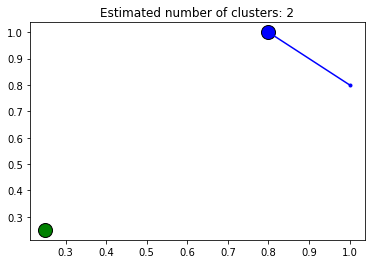

In [158]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [163]:
cluster_centers_indices

array([1, 2], dtype=int64)